### Final Project
#### Bianca Amoako
#### 11/22/2024

I am interested in looking at the data available from the youth prisons in Ohio. Underneath the [Ohio Department of Youth Services](https://dys.ohio.gov/wps/portal/gov/dys/home), there are three youth prisons in Ohio that are accredited by the American Correctional Association. The three facilities are:
-  Cuyahoga Hills Juvenile Correctional Facility (CHJCF)
-  Indian River Juvenile Correctional Facility (IRJCF)
-  Circleville Juvenile Correctional Facility (CJCF)

All three facilities serve only male youth and have a variety of programs to reform the youth population admitted.

![](map_facilities.png)

---
#### DataOhio dataset [Youth Services Current Facility Population](https://data.ohio.gov/wps/portal/gov/data/view/youth-services-current-facility-population?visualize=true) 
This data shows the current population (as of November 22, 2024) of all of the correctional facilities in Ohio. I selected the three youth prisons and their race break down but it is in pdf format. To convert it to csv files I will use the tabula-py and the function .convert_into()

In [141]:
import tabula
import pandas as pd

In [142]:
tabula.convert_into("cuyahoga_by_race.pdf", "cuya_by_race.csv", output_format="csv", pages='all')
cuyah_race_df = pd.DataFrame(pd.read_csv("cuya_by_race.csv"))
#tidy
cuyah_race_df["Facility"] = "CHJCF"
cuyah_race_df.loc[3, "Race"] = "Mixed-Race"
cuyah_race_df = cuyah_race_df.drop(5)
cuyah_race_df = cuyah_race_df.rename(columns={"Current\rPopulation": "Current Population"})
cuyah_race_df["Total"] = cuyah_race_df["Current Population"].cumsum()
cuyah_race_df

,Race,Current Population,Facility,Total
0,White,19,CHJCF,19
1,Black,153,CHJCF,172
2,Hispanic,7,CHJCF,179
3,Mixed-Race,5,CHJCF,184
4,Asian,1,CHJCF,185


In [143]:
tabula.convert_into("indian_river_by_race.pdf", "indian_by_race.csv", output_format="csv", pages='all')
indian_race_df = pd.DataFrame(pd.read_csv("indian_by_race.csv"))
#tidy
indian_race_df["Facility"] = "IRJCF"
indian_race_df.loc[4, "Race"] = "American Indian"
indian_race_df = indian_race_df.drop(5)
indian_race_df = indian_race_df.rename(columns={"Current\rPopulation": "Current Population"})
indian_race_df["Total"] = indian_race_df["Current Population"].cumsum()
indian_race_df

,Race,Current Population,Facility,Total
0,White,28,IRJCF,28
1,Black,113,IRJCF,141
2,Hispanic,8,IRJCF,149
3,Mixed-Race,5,IRJCF,154
4,American Indian,1,IRJCF,155


In [144]:
tabula.convert_into("circleville_by_race.pdf", "circle_by_race.csv", output_format="csv", pages='all')
circle_race_df = pd.DataFrame(pd.read_csv("circle_by_race.csv"))
#tidy
circle_race_df["Facility"] = "CJCF"
circle_race_df.loc[4, "Race"] = "American Indian"
circle_race_df = circle_race_df.drop(5)
circle_race_df = circle_race_df.rename(columns={"Current\rPopulation": "Current Population"})
circle_race_df["Total"] = circle_race_df["Current Population"].cumsum()
circle_race_df

,Race,Current Population,Facility,Total
0,White,30,CJCF,30
1,Black,107,CJCF,137
2,Hispanic,6,CJCF,143
3,Mixed-Race,2,CJCF,145
4,American Indian,2,CJCF,147


In [145]:
from matplotlib import pyplot as plt
import numpy as np

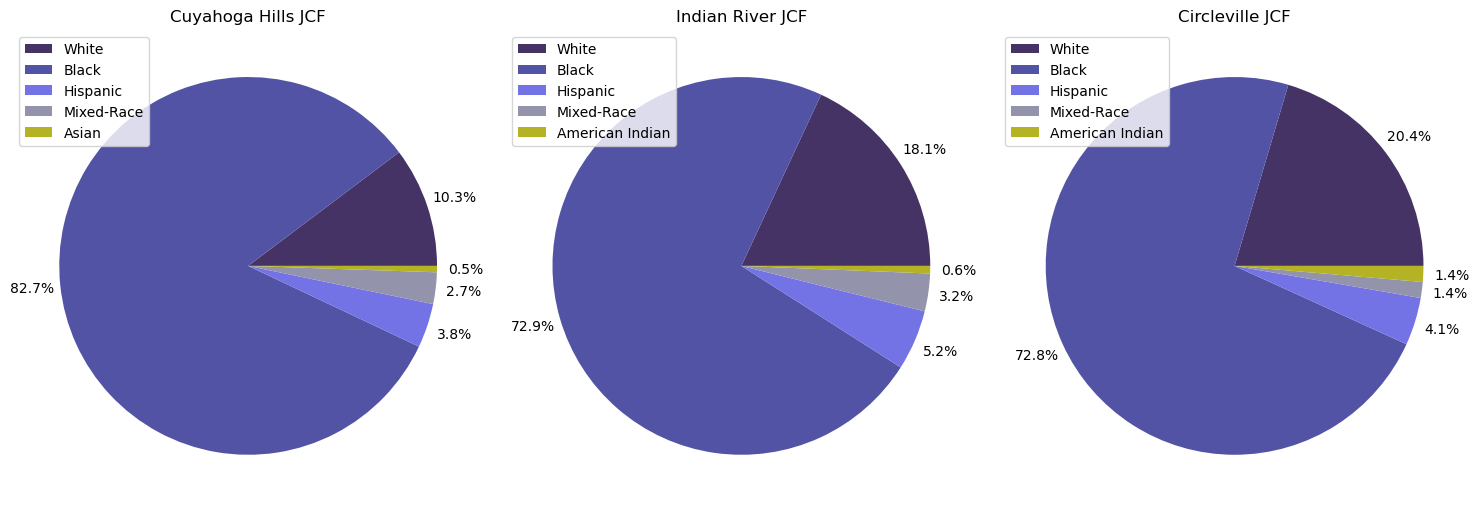

In [146]:
fig1, ax1 = plt.subplots(1,3, figsize = (15, 20))
colors_ = plt.get_cmap('gist_stern')(np.linspace(0.2, 0.7, len(cuyah_race_df)))
#Cuyahoga Pie
ax1[0].pie(cuyah_race_df["Current Population"], colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax1[0].set_title("Cuyahoga Hills JCF")
ax1[0].legend(cuyah_race_df["Race"], loc = "upper left")

#Indian River Pie
ax1[1].pie(indian_race_df["Current Population"], colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax1[1].set_title("Indian River JCF")
ax1[1].legend(indian_race_df["Race"], loc = "upper left")


#Circleville Pie
ax1[2].pie(circle_race_df["Current Population"], colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax1[2].set_title("Circleville JCF")
ax1[2].legend(circle_race_df["Race"], loc = "upper left")

fig1.tight_layout()
plt.show()

#### There's clearly a much greater number of Black or African Americans admitted to these correctional facilities as shown in the pie charts above. How does it connect to the broader population of adult incarceration or all of Ohio?